In [1]:
%matplotlib inline

# Machine Learning - Clustering and Classification

Machine learning is often divided into three broad categories, supervised, unsupervised and reinforcement learning. We'll be skipping reinforcement learning today, so we can focus on supervised and unsupervised algorithms.

## Supervised Learning

Supervised learning is based on the notion of taking a set of data called a training set, consisting of labeled examples, and using it to build a model of how to classify new examples to fit within the existing training set.

### K Nearest Neighbors
Today we're going to build a training set and use scikit-learn to build a KNN classifier. As you will see, using existing algorithms (rather than building your own) is extremely simple, so there's no reason not to experiment.

In [2]:
import random

Instead of generating a set by hand, let's create a randomize set of points on a plot colored differently based on different distributions. We'll use three different gaussian distributions to create the set.

In [28]:
red   = [(round(random.gauss(27, 10)), round(random.gauss(31, 10))) for x in range(100)]
green = [(round(random.gauss(40, 8)), round(random.gauss(40, 9))) for x in range(100)]
blue  = [(round(random.gauss(50, 10)), round(random.gauss(60, 12))) for x in range(100)]

In [29]:
import matplotlib.pyplot as plt # Let's plot!

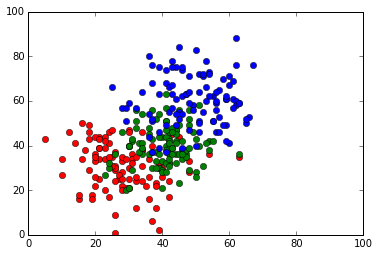

In [30]:
plt.rc('axes', color_cycle=['r', 'g', 'b'])
plt.axis([0, 100, 0, 100])
plt.plot([x for x,y  in red], [y for x,y in red], 'ro')
plt.plot([x for x,y in green], [y for x,y in green], 'go')
plt.plot([x for x,y in blue], [y for x,y in blue], 'bo')
plt.show()

That looks like a pretty good distribution. Now we can see that there are intuitively three regions of the graph where there are points of a particular color dominating. The KNN algorithm predicts an unlabeled point is most likely to be the same color as its K nearest neighbors. 

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
neighbors = KNeighborsClassifier(n_neighbors=5)

In [39]:
neighbors.fit(red + green + blue, [0]*100 + [1]*100 + [2]*100) # we have to put all points in serially and label each

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

In [61]:
print("Point\t\tProbability")
for x,y in zip(range(20, 80, 3), range(20, 80, 3)):
    r,g,b = neighbors.predict_proba([x,y])[0]
    print("P: ({},{})\tR: {}%\n\t\tG: {}%\n\t\tB: {}%\n".format(x, y, r*100, g*100, b*100))

Point		Probability
P: (20,20)	R: 100.0%
		G: 0.0%
		B: 0.0%

P: (23,23)	R: 80.0%
		G: 20.0%
		B: 0.0%

P: (26,26)	R: 100.0%
		G: 0.0%
		B: 0.0%

P: (29,29)	R: 80.0%
		G: 20.0%
		B: 0.0%

P: (32,32)	R: 100.0%
		G: 0.0%
		B: 0.0%

P: (35,35)	R: 20.0%
		G: 80.0%
		B: 0.0%

P: (38,38)	R: 0.0%
		G: 60.0%
		B: 40.0%

P: (41,41)	R: 0.0%
		G: 100.0%
		B: 0.0%

P: (44,44)	R: 40.0%
		G: 60.0%
		B: 0.0%

P: (47,47)	R: 0.0%
		G: 80.0%
		B: 20.0%

P: (50,50)	R: 0.0%
		G: 40.0%
		B: 60.0%

P: (53,53)	R: 0.0%
		G: 0.0%
		B: 100.0%

P: (56,56)	R: 0.0%
		G: 0.0%
		B: 100.0%

P: (59,59)	R: 0.0%
		G: 0.0%
		B: 100.0%

P: (62,62)	R: 0.0%
		G: 0.0%
		B: 100.0%

P: (65,65)	R: 0.0%
		G: 0.0%
		B: 100.0%

P: (68,68)	R: 0.0%
		G: 0.0%
		B: 100.0%

P: (71,71)	R: 0.0%
		G: 0.0%
		B: 100.0%

P: (74,74)	R: 0.0%
		G: 0.0%
		B: 100.0%

P: (77,77)	R: 0.0%
		G: 0.0%
		B: 100.0%



## Unupervised Learning

Unupervised learning is based on the idea of pattern matching, where an algorithm learns to find patterns in the data and separates data based on which pattern it fits.


### K-Means
For the Unsupervises learning example, we're going to cluster some distinct points into groups. Let's start the same way as last time.

In [69]:
red2   = [(round(random.gauss(17, 5)), round(random.gauss(21, 6))) for x in range(20)]
green2 = [(round(random.gauss(40, 8)), round(random.gauss(40, 6))) for x in range(20)]
blue2  = [(round(random.gauss(60, 7)), round(random.gauss(60, 4))) for x in range(20)]

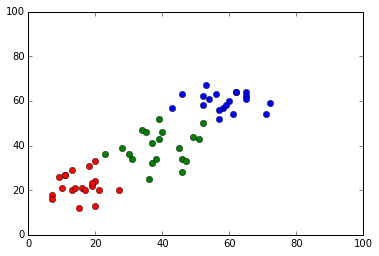

In [71]:
plt.rc('axes', color_cycle=['r', 'g', 'b'])
plt.axis([0, 100, 0, 100])
plt.plot([x for x,y  in red], [y for x,y in red2], 'ro')
plt.plot([x for x,y in green], [y for x,y in green2], 'go')
plt.plot([x for x,y in blue], [y for x,y in blue2], 'bo')
plt.show()

It's clear for the most part where the boundaries between these different point groups is when we look at a colored chart. Now let's see if we can get sklearn to figure out the same, just looking at the data with no help.

In [73]:
from sklearn.cluster import KMeans

In [75]:
kmeans = KMeans(n_clusters=3) # We know there are three clusters

In [77]:
kmeans.fit(red2+green2+blue2)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [87]:
print("Red:\t{}".format(" ".join(str(kmeans.predict(pt)[0]) for pt in red)))
print("Green:\t{}".format(" ".join(str(kmeans.predict(pt)[0]) for pt in green)))
print("Blue:\t{}".format(" ".join(str(kmeans.predict(pt)[0]) for pt in blue)))

Red:	1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
Green:	0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
Blue:	2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2


There you have it! On its own, knowing only to separate into three clusters, via the K-Means algorithm sklearn was able to find the boundaries between each cluster.